In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# matplotlib 한글 깨짐 해결
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:\Windows\Fonts\malgun.ttf").get_name()
rc('font', family=font_name)

In [4]:
from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.metrics import classification_report,confusion_matrix
# import itertools

In [5]:
df = pd.read_csv('credit_card_data.csv')
df.head(1)

,pop_cd,year,month,avg_score,avg_rat,city,sex,ages,population,num_opencard,...,monthly_installments_loan,monthly_insurance_loan,monthly_sbk_loan,loan_commitment,inst_rep_loanb,ls_rep_loanb,credit_loan,mortgage_loan,credit_card_payment,credit_card_installments_payment
0,L011,2016,1,812,2,서울,NaN,10대,55000,1.44,...,0,0,0,1120000,8210000,78020000,92170000,87260000,0,0


In [6]:
df['card_use_rate'] = df['num_usecard'] / df['num_opencard'] * 100

In [7]:
data_by_sex = df[df.pop_cd.str[0]=='Y'] # 지역x, 성별o
data_by_loc = df[df.pop_cd.str[0]=='L'] # 지역o, 성별x

In [8]:
data_by_loc.columns

Index(['pop_cd', 'year', 'month', 'avg_score', 'avg_rat', 'city', 'sex',
       'ages', 'population', 'num_opencard', 'num_usecard',
       'monthly_card_spend', 'monthly_lc', 'monthly_loan', 'monthly_bk_loan',
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'monthly_sbk_loan', 'loan_commitment',
       'inst_rep_loanb', 'ls_rep_loanb', 'credit_loan', 'mortgage_loan',
       'credit_card_payment', 'credit_card_installments_payment',
       'card_use_rate'],
      dtype='object')

In [9]:
data_by_seoul = data_by_loc[data_by_loc.city=='서울']
data_by_incheon = data_by_loc[data_by_loc.city=='인천']
data_by_gyeonggi = data_by_loc[data_by_loc.city=='경기']
data_by_capital = pd.concat([data_by_seoul,data_by_incheon,data_by_gyeonggi])

In [10]:
data_by_10s = data_by_loc[data_by_loc.ages=='10대']
data_by_20s = data_by_loc[data_by_loc.ages=='20대']
data_by_30s = data_by_loc[data_by_loc.ages=='30대']
data_by_40s = data_by_loc[data_by_loc.ages=='40대']
data_by_50s = data_by_loc[data_by_loc.ages=='50대']
data_by_60s = data_by_loc[data_by_loc.ages=='60대']
data_by_70s = data_by_loc[data_by_loc.ages=='70대']
data_by_80s = data_by_loc[data_by_loc.ages=='80대']
data_by_90s = data_by_loc[data_by_loc.ages=='90대']

c:\users\kimjihyeon\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\kimjihyeon\miniconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


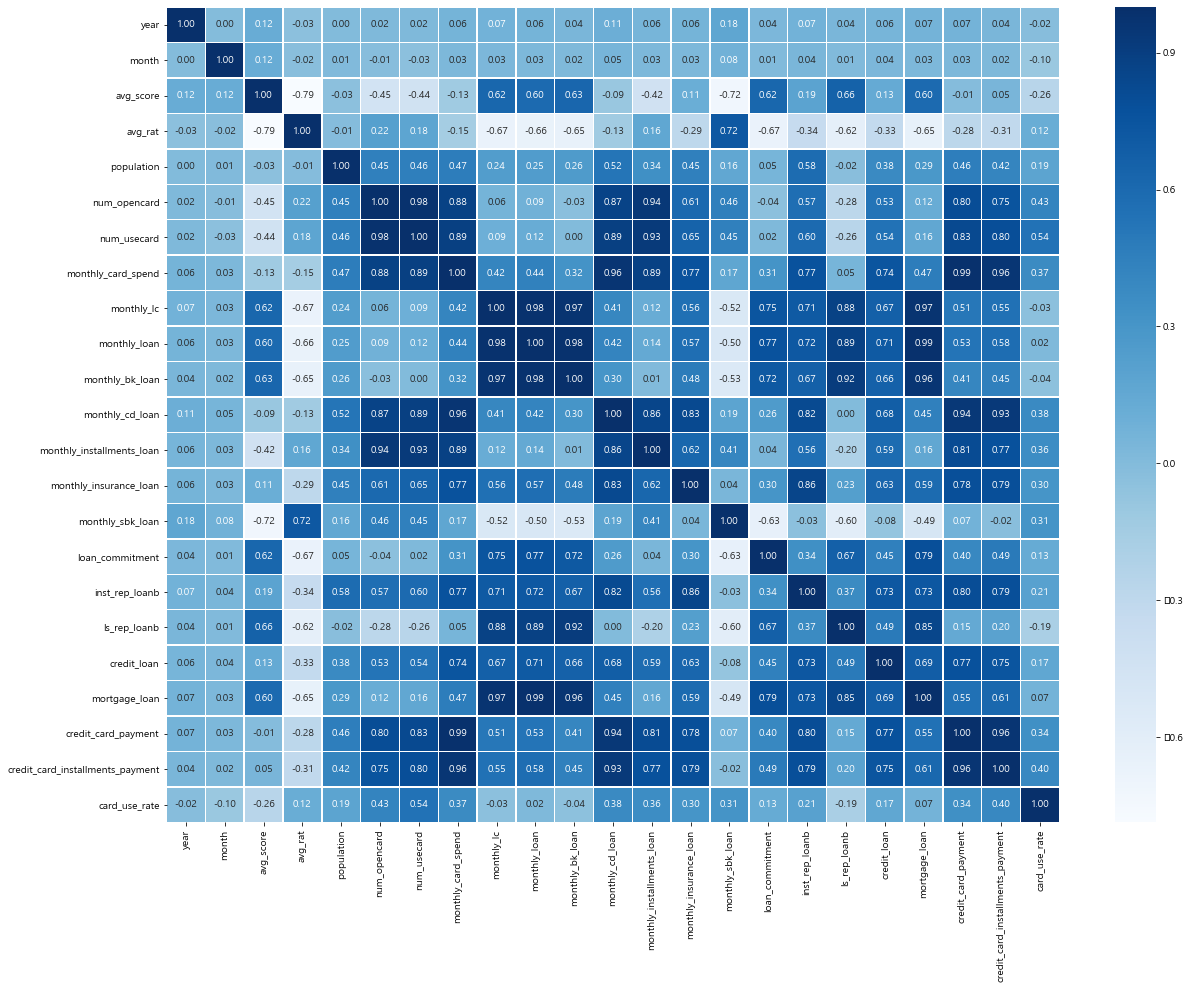

In [8]:
plt.figure(figsize=(20,15))
sns.heatmap(data=data_by_loc.corr(), annot=True,
           fmt='.2f', linewidths=.5, cmap='Blues')

신용점수와 신용점수는 <br>
총대출약정금액(monthly_lc), 총대출금액(monthly_loan),
은행업종대출금액(monthly_bk_loan), 저축은행업종대출금액(monthly_sbk_loan), 
<br>
한도대출 총약정금액(loan_commitment), 일시상환대출 총잔액(ls_rep_loanb), 
담보대출총액(morgage_loan)<br>
을 제외한 나머지 칼럼과는 연관성이 적다(0.6이하이다)

> # 신용점수 또는 신용등급과 연관성(correlation)이 낮은 지표들끼리 머신러닝을 통해 학습시켰더니 0.9이상의 확률로 예측 한다.

> 신용등급 예측( accuracy_score: 정확도 )

In [9]:
import itertools
lst = ['num_opencard', 'num_usecard', 'monthly_card_spend', 
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'inst_rep_loanb', 'ls_rep_loanb', 
       'credit_loan', 'credit_card_payment', 'credit_card_installments_payment']
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)

In [ ]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

warnings.filterwarnings(action='ignore')
accuracy_score_list=[]

for i in range(len(combs)):
    y = data_by_loc.avg_rat
    X = data_by_loc[combs[i]]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    rfc = RandomForestClassifier(n_estimators=600)
    rfc.fit(X_train, y_train)
    predictions = rfc.predict(X_test)
    accuracy_score_list.append(accuracy_score(y_test, predictions))
#     print(combs[i], accuracy_score(y_test, predictions))

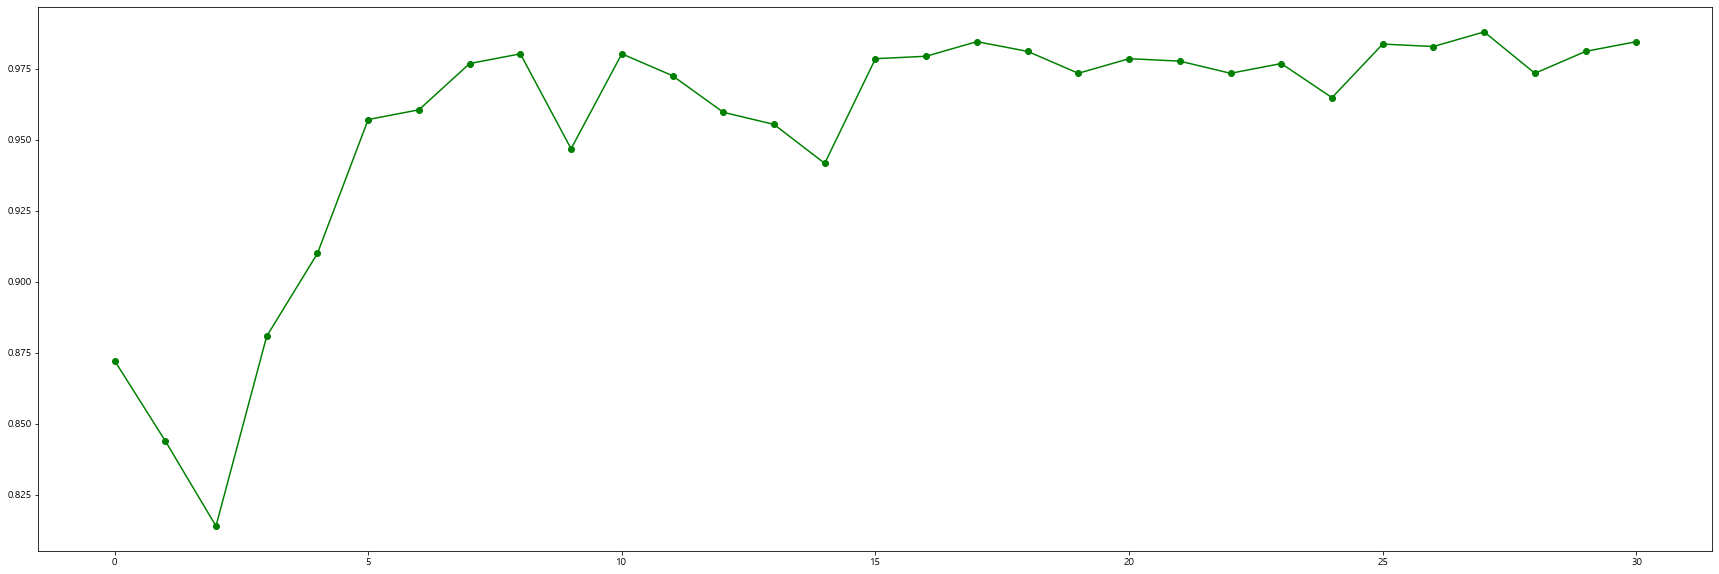

In [11]:
plt.figure(figsize=(30,10))
plt.plot(accuracy_score_list,color='green',marker='o',linestyle='solid')
plt.show()

월별 카드사용액(monthly_card_spend)으로 신용등급(avg_rat)을 예측하기가 가장 어렵다.

> 신용점수 예측( mean_squared_error: 오차 )

In [11]:
import itertools
lst = ['num_opencard', 'num_usecard', 'monthly_card_spend', 
       'monthly_cd_loan', 'monthly_installments_loan',
       'monthly_insurance_loan', 'inst_rep_loanb', 'ls_rep_loanb', 
       'credit_loan', 'credit_card_payment', 'credit_card_installments_payment']
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)

In [15]:
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings(action='ignore')
rmse_list=[]

for i in range(len(combs)):
    y = data_by_loc.avg_score
    X = data_by_loc[combs[i]]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse_list.append( np.sqrt(mse) )
    if (np.sqrt(mean_squared_error(y_test, predictions))>20):
            print(combs[i], " mse: ", np.sqrt(mean_squared_error(y_test, predictions)) )

['num_opencard']  mse:  20.307395082116237
['num_usecard']  mse:  20.876324839607776
['monthly_card_spend']  mse:  22.943681748129546
['monthly_cd_loan']  mse:  22.697329064593205
['monthly_installments_loan']  mse:  20.517871576503875
['monthly_insurance_loan']  mse:  22.508693772084087
['inst_rep_loanb']  mse:  22.434258401084108
['credit_loan']  mse:  22.7511991799039
['credit_card_payment']  mse:  23.197806455575027
['credit_card_installments_payment']  mse:  22.716535649369163
['num_opencard', 'num_usecard']  mse:  20.20764221241048
['num_opencard', 'monthly_installments_loan']  mse:  20.051340958138734
['num_usecard', 'monthly_installments_loan']  mse:  20.77320776346263
['monthly_card_spend', 'monthly_cd_loan']  mse:  22.86426991520467
['monthly_card_spend', 'monthly_insurance_loan']  mse:  21.74231302346483
['monthly_card_spend', 'inst_rep_loanb']  mse:  20.073440853406165
['monthly_card_spend', 'credit_loan']  mse:  21.104986793605054
['monthly_cd_loan', 'monthly_insurance_loa

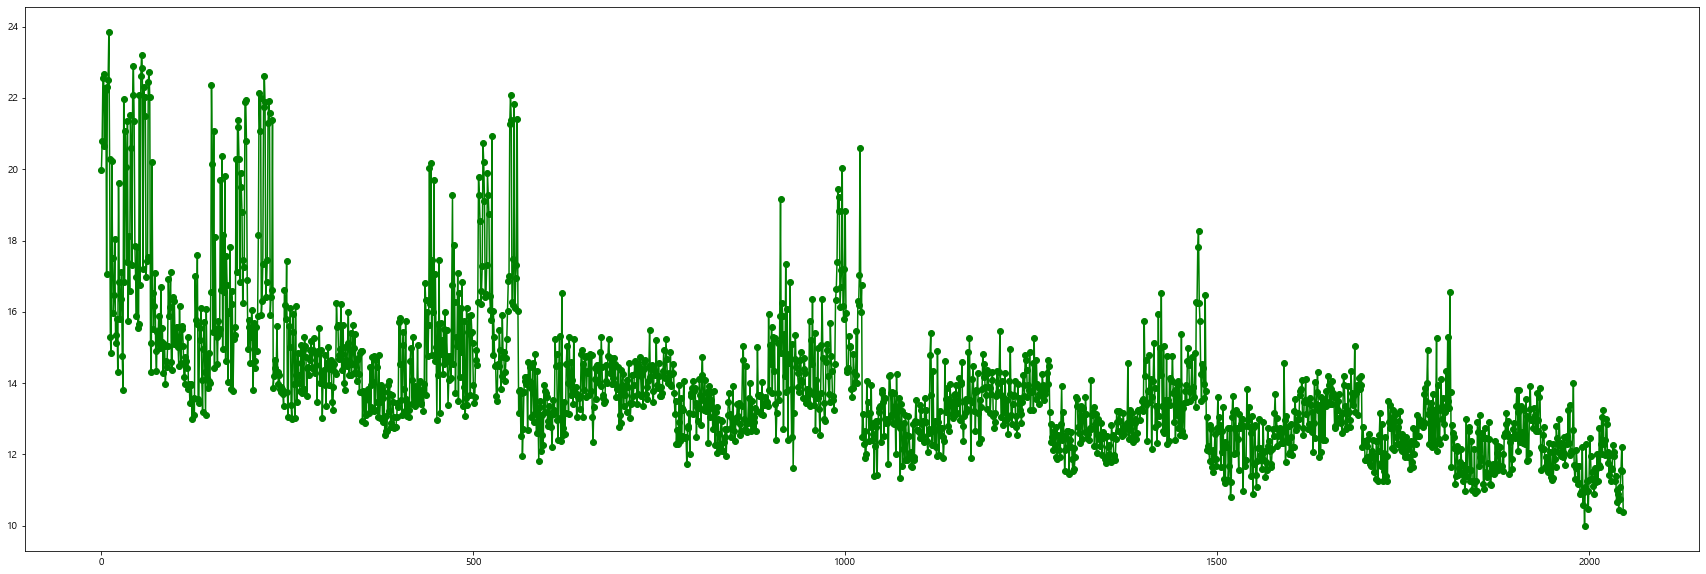

In [11]:

plt.figure(figsize=(30,10))
plt.plot(rmse_list,color='green',marker='o',linestyle='solid')
plt.show()

칼럼이 한두개 일 때는 예측에 대한 오차가 크지만
두 개 이상의 칼럼이 결합되었을 때는 예측에 대한 오차가 적어진다.<br>
하지만,[보험업종대출과 분할상환대출잔액], [카드업종대출과 보험업종대출]. [월카드이용금액, 카드업종대출]이 결합하였을 때 예측 오차가 크다.

># 월별 카드 이용금액 예측

월별 카드 이용금액은 <br>
신용점수(avg_score), 총대출약정금액(mothly_lc),총대출금액(monthly_loan), 은행대출금액(monthly_bk_loan),저축은행대출금액(monthly_sbk_loan), <br>
한도대출 총약정금액(loan_commitment), 일시상환대출 잔액(ls_rep_loanb), 담보대출 총합(mortagage_loan)과 연관성이 적다(0.6이하)

In [1]:
import itertools
lst = ['avg_score', 'monthly_lc', 'monthly_loan', 'monthly_bk_loan', 'monthly_sbk_loan', 'loan_commitment', 'ls_rep_loanb', 'mortgage_loan']
combs = []

for i in range(1, len(lst)+1):
    els = [list(x) for x in itertools.combinations(lst, i)]
    combs.extend(els)

In [11]:
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

warnings.filterwarnings(action='ignore')
rmse_list=[]

for i in range(len(combs)):
    y = data_by_loc['monthly_card_spend']
    X = data_by_loc[combs[i]]
    X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    predictions = lm.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    rmse_list.append( np.sqrt(mse) )   
#     print(combs[i], " mse: ",mean_squared_error(y_test, predictions))

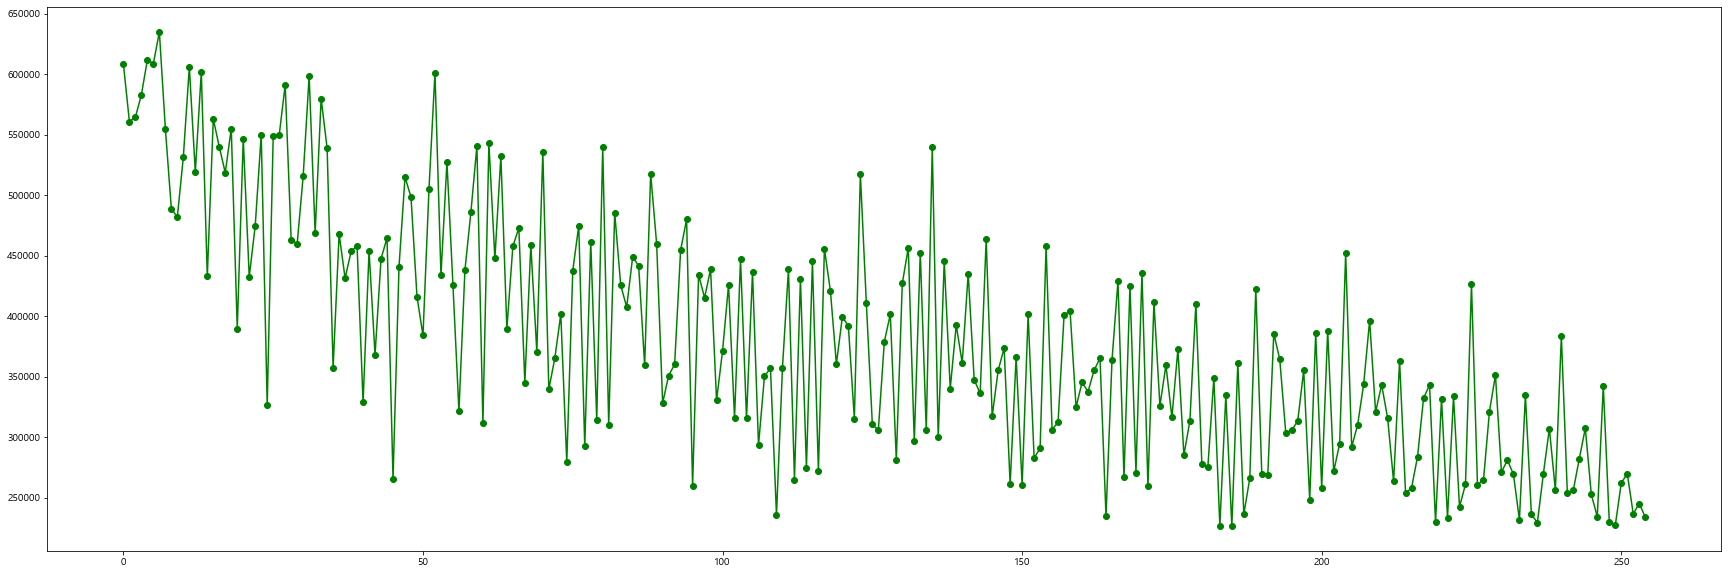

In [13]:
plt.figure(figsize=(30,10))
plt.plot(rmse_list,color='green',marker='o',linestyle='solid')
plt.show()